Sanity check on Sinkhorn algorithm as experimented in [experiment](https://stephens999.github.io/misc/sinkhorn.html)

In [1]:
import os
import sys
import pandas as pd
from scipy import sparse
import pickle

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions_anchor import *
from misc import *
from sinkhorn import * 

np.random.seed(123)

In [2]:
# def sinkhorn(X, niter = 10):
#     c = X.mean(axis = 0)
#     for i in range(niter):
#         r = 1/(X * c).mean(axis = 1)
#         c = 1/(X * r[:, None]).mean(axis = 0)        
#     Xnorm = np.sqrt(r)[:, None] * X * np.sqrt(c)
    
#     return Xnorm, r, c
    

In [3]:
m = 300
n = 1000
r = 10

B = np.exp( 2 * np.random.normal(size = (m, r)) )
C = np.random.uniform(size = (r, n))
X = B @ C
X = X / X.mean()

Y = np.random.poisson(lam = X, size = (m, n))

Ynorm, r, c = sinkhorn(Y)
u, s, vh  = np.linalg.svd(Ynorm/np.sqrt(n), full_matrices=False)
d = s**2

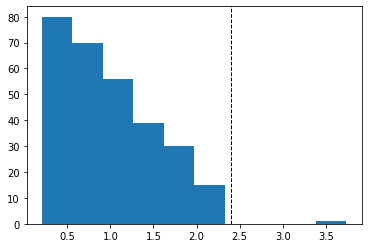

10


In [4]:
betaplus = (1 + np.sqrt(m/n))**2
plt.hist(d[d < 4])
plt.axvline(betaplus, color='k', linestyle='dashed', linewidth=1)
plt.show()

print(np.sum(d > betaplus))

In [5]:
print(u.shape)
print(vh.shape)

(300, 300)
(300, 1000)


In [6]:
Y.shape

(300, 1000)

In [7]:
r = 50
 

In [8]:
C = X2C_svd(Ynorm)

In [9]:
C.min()

1e-16